<a href="https://colab.research.google.com/github/zaidhamad139/Prediction-of-Product-Sales/blob/main/Project_4_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [9]:
import zipfile
import io
with zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), 'r') as zip_ref:
    zip_ref.extractall('/tmp/extracted_data')
import pandas as pd
df = pd.read_csv('/tmp/extracted_data/Car_Insurance_Claim.csv')
display(df.head())

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [8]:
import os
extracted_files = os.listdir('/tmp/extracted_data')
print(extracted_files)


['Car_Insurance_Claim.csv']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

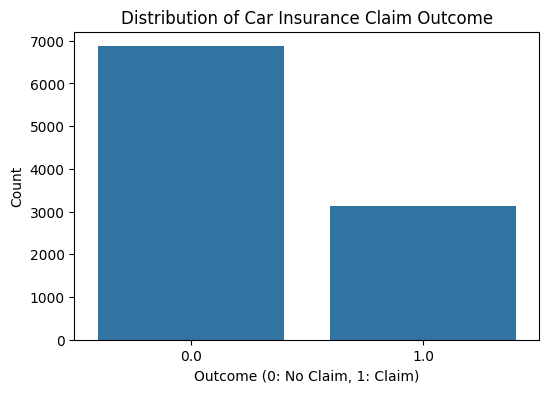

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.countplot(x='OUTCOME', data=df)
plt.title('Distribution of Car Insurance Claim Outcome')
plt.xlabel('Outcome (0: No Claim, 1: Claim)')
plt.ylabel('Count')
plt.show()

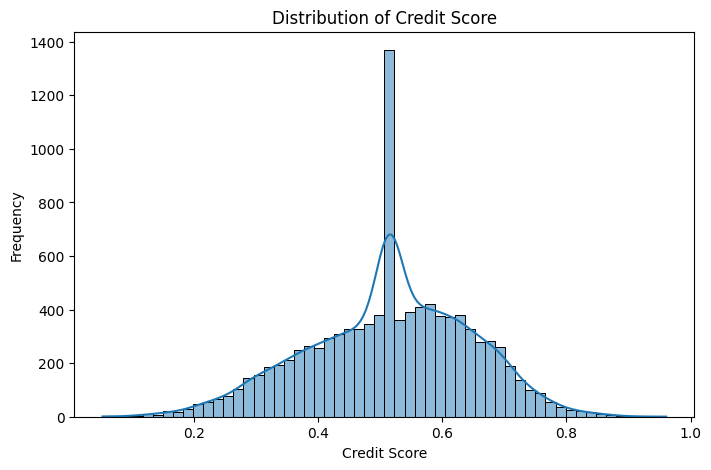

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CREDIT_SCORE'], kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

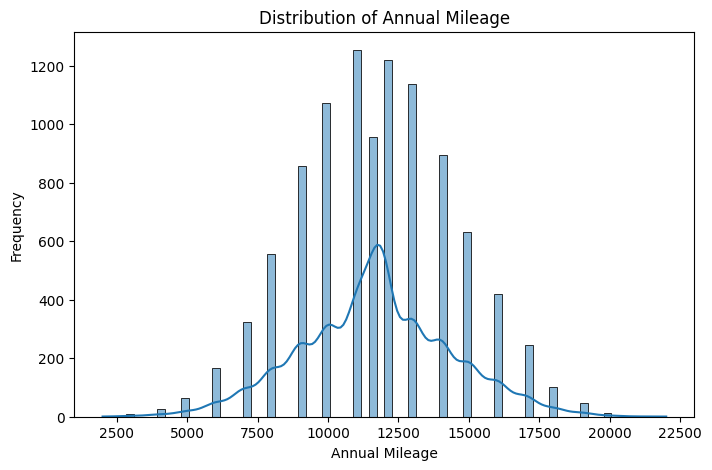

In [24]:

plt.figure(figsize=(8, 5))
sns.histplot(df['ANNUAL_MILEAGE'], kde=True)
plt.title('Distribution of Annual Mileage')
plt.xlabel('Annual Mileage')
plt.ylabel('Frequency')
plt.show()

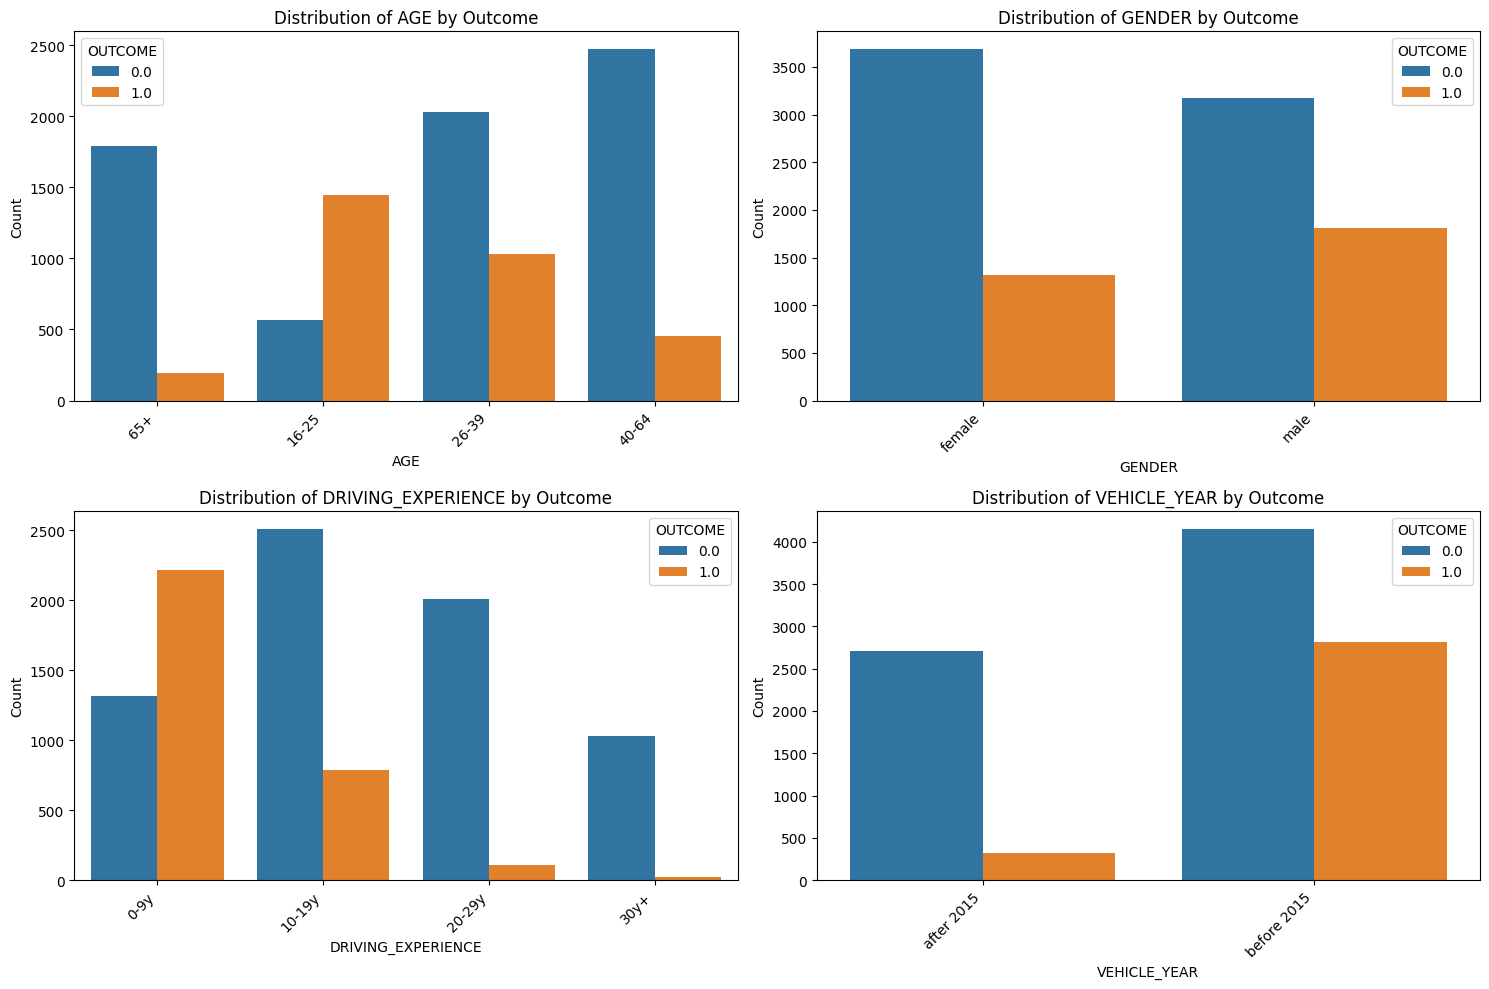

In [25]:

categorical_features = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'VEHICLE_YEAR']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df, hue='OUTCOME')
    plt.title(f'Distribution of {col} by Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


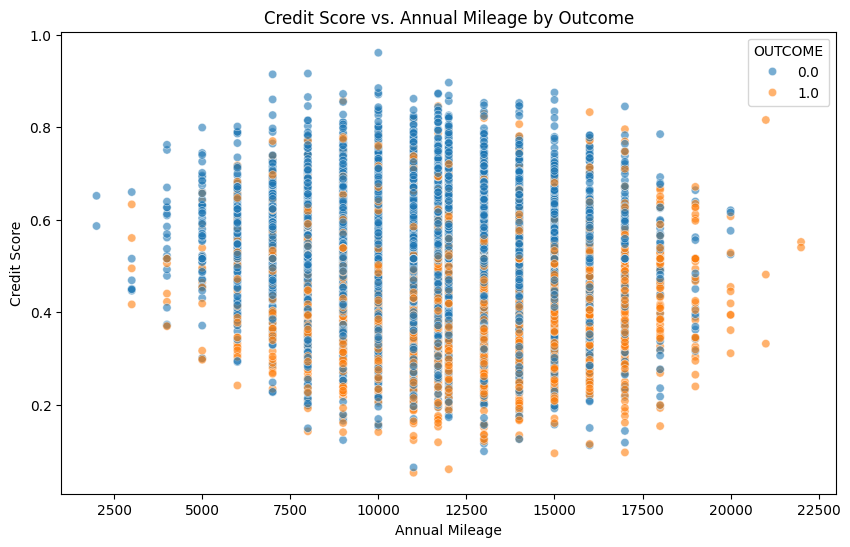

In [26]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ANNUAL_MILEAGE', y='CREDIT_SCORE', hue='OUTCOME', data=df, alpha=0.6)
plt.title('Credit Score vs. Annual Mileage by Outcome')
plt.xlabel('Annual Mileage')
plt.ylabel('Credit Score')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']





In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
num_cols = X_train.select_dtypes('number').columns
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
numeric_pipe = make_pipeline(impute_median, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [33]:
num_tuple = ('numeric', numeric_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
        'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [35]:
ord_cols = []
impute_common = SimpleImputer(strategy='most_frequent')
ord_encoder = OrdinalEncoder(categories=[])
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder(categories=[])),
                ('standardscaler', StandardScaler())])

In [36]:
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder', OrdinalEncoder(categories=[])),
                 ('standardscaler', StandardScaler())]),
 [])

In [37]:
cat_cols = X_train.select_dtypes('object').drop(ord_cols, axis=1).columns
impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [38]:
col_transformer = ColumnTransformer([
    ('numeric', numeric_pipe, num_cols),
    ('categorical', ohe_pipe, cat_cols)
], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
linreg_pipe = make_pipeline(col_transformer, lin_reg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [40]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [29]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
logistic_regression = LogisticRegression(random_state=42)
clf_pipe = make_pipeline(col_transformer, logistic_regression)
clf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [43]:
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_pred_test = clf_pipe.predict(X_test)

label='Test Data'

report = classification_report(y_test, y_pred_test,)

header = "-"*60
print(header, f" Classification Metrics: {label}", header, sep='\n')
print(report)

------------------------------------------------------------
 Classification Metrics: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1373
         1.0       0.74      0.73      0.73       627

    accuracy                           0.83      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.83      0.83      0.83      2000



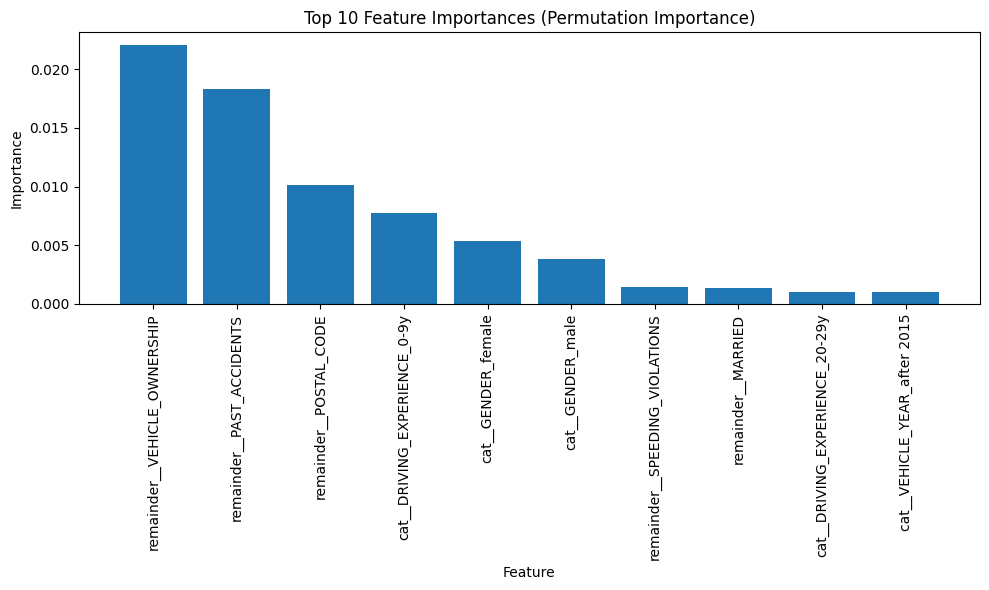

In [18]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(model, X_test_processed, y_test, n_repeats=10, random_state=42)

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Store importance values and feature names in a DataFrame
importance_df = pd.DataFrame({'feature': feature_names, 'importance': result.importances_mean})

# Sort by importance in descending order
importance_df = importance_df.sort_values('importance', ascending=False)

# Select top 10 features
top_10_features = importance_df.head(10)

# Create a bar plot of the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['feature'], top_10_features['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (Permutation Importance)')
plt.tight_layout()
plt.show()

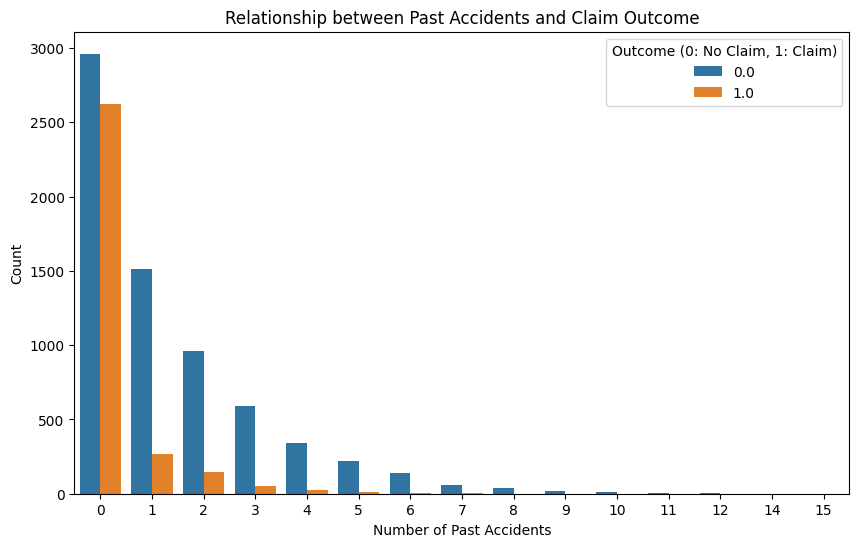

Explanation for Plot 1:
This plot shows the distribution of car insurance claim outcomes based on the number of past accidents a policyholder has had.
We can observe that as the number of past accidents increases, the proportion of claims (Outcome = 1) also tends to increase.
Policyholders with 0 past accidents are less likely to file a claim compared to those with one or more past accidents.
This aligns with the feature importance analysis, indicating that past accidents are a strong predictor of future claims.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features from top_10_features for visualization: 'PAST_ACCIDENTS' and 'DRIVING_EXPERIENCE_0-9y'
# Note: Need to map back to original column names for visualization on df
# 'remainder__PAST_ACCIDENTS' corresponds to 'PAST_ACCIDENTS'
# 'cat__DRIVING_EXPERIENCE_0-9y' corresponds to 'DRIVING_EXPERIENCE' where the category is '0-9y'

# Plot 1: Relationship between PAST_ACCIDENTS and OUTCOME
plt.figure(figsize=(10, 6))
sns.countplot(x='PAST_ACCIDENTS', hue='OUTCOME', data=df)
plt.title('Relationship between Past Accidents and Claim Outcome')
plt.xlabel('Number of Past Accidents')
plt.ylabel('Count')
plt.legend(title='Outcome (0: No Claim, 1: Claim)')
plt.show()

print("Explanation for Plot 1:")
print("This plot shows the distribution of car insurance claim outcomes based on the number of past accidents a policyholder has had.")
print("We can observe that as the number of past accidents increases, the proportion of claims (Outcome = 1) also tends to increase.")
print("Policyholders with 0 past accidents are less likely to file a claim compared to those with one or more past accidents.")
print("This aligns with the feature importance analysis, indicating that past accidents are a strong predictor of future claims.")

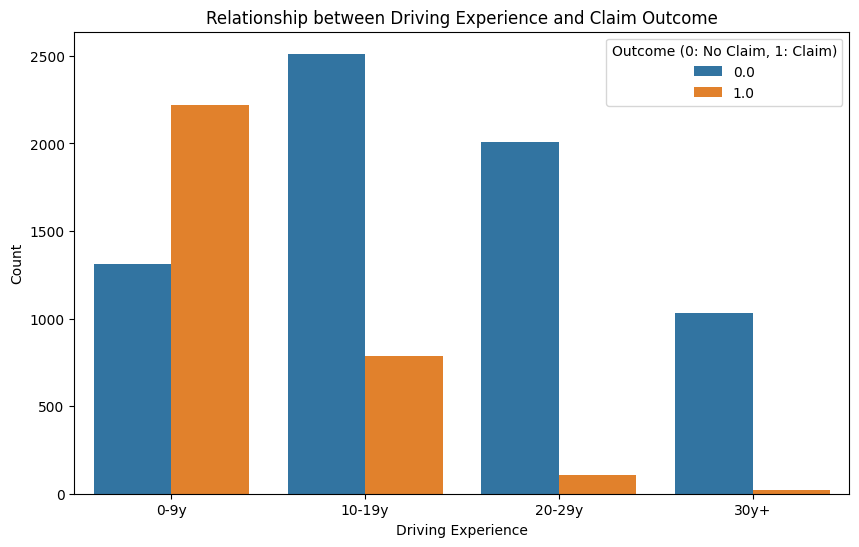

Explanation for Plot 2:
This plot illustrates how the likelihood of filing a car insurance claim varies with different levels of driving experience.
Drivers with 0-9 years of experience show a relatively higher proportion of claims compared to more experienced drivers.
As driving experience increases (10-19y, 20-29y, 30y+), the proportion of claims generally decreases.
This supports the feature importance finding that driving experience, particularly being a less experienced driver (0-9y), is a significant factor in predicting claims.


In [21]:
# Plot 2: Relationship between DRIVING_EXPERIENCE and OUTCOME
plt.figure(figsize=(10, 6))
sns.countplot(x='DRIVING_EXPERIENCE', hue='OUTCOME', data=df, order=['0-9y', '10-19y', '20-29y', '30y+'])
plt.title('Relationship between Driving Experience and Claim Outcome')
plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.legend(title='Outcome (0: No Claim, 1: Claim)')
plt.show()

print("Explanation for Plot 2:")
print("This plot illustrates how the likelihood of filing a car insurance claim varies with different levels of driving experience.")
print("Drivers with 0-9 years of experience show a relatively higher proportion of claims compared to more experienced drivers.")
print("As driving experience increases (10-19y, 20-29y, 30y+), the proportion of claims generally decreases.")
print("This supports the feature importance finding that driving experience, particularly being a less experienced driver (0-9y), is a significant factor in predicting claims.")